In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv(r"/Users/rahulpoojith/Documents/Excelr Datasets/Machine Learning Datasets/heart_disease.csv")

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [39]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

Exploratory Data Analysis (EDA):
    
Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [42]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [45]:
df.duplicated().any()

True

In [46]:
df.duplicated().sum()

1

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

In [50]:
df['oldpeak'].mean()

0.8923076923076924

In [52]:
df['oldpeak']=df['oldpeak'].fillna(0.8)

In [53]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

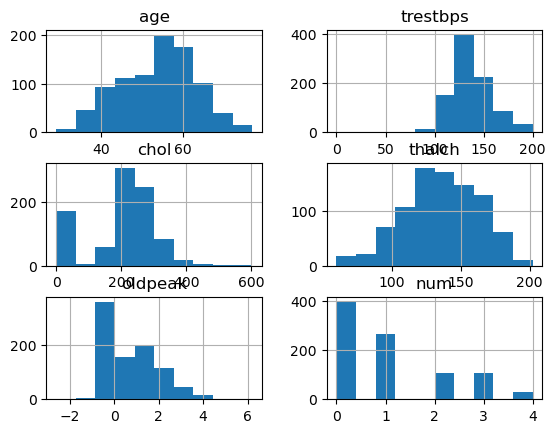

In [54]:
df.hist()
plt.show()

In [59]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

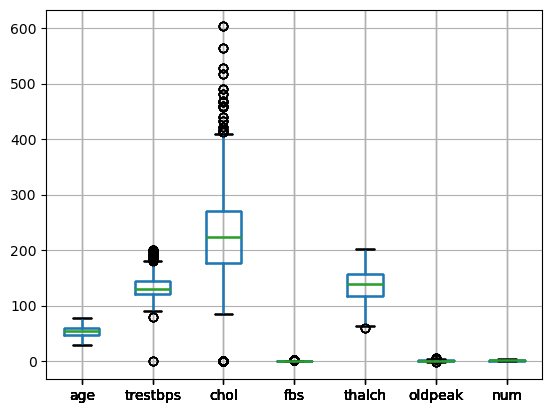

In [61]:
for i in num_col:
    df.boxplot(column=num_col)
plt.show()

chol has more outlires

In [65]:
Q1=df['chol'].quantile(0.25)
Q1   

176.5

In [66]:
Q3=df['chol'].quantile(0.75)
Q3

270.0

In [68]:
IQR=Q3-Q1
IQR

93.5

In [69]:
Lower_Extreme= Q1-1.5*IQR                 ## Find the Lower extreme
Lower_Extreme

36.25

In [70]:
Upper_Extreme= Q3+1.5*IQR                 ## Find the Lower extreme
Upper_Extreme

410.25

In [71]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.885998,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.056250,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [75]:
df_outlier_chol= df[(df['chol']<Lower_Extreme) | (df['chol']>Upper_Extreme)]
df_outlier_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
74,65,Female,non-anginal,140,417,True,lv hypertrophy,157,FALSE,0.8,upsloping,normal,0
147,43,Female,non-anginal,150,439,False,normal,175,FALSE,0.0,upsloping,normal,0
152,56,Male,non-anginal,120,0,False,normal,97,FALSE,0.0,flat,reversable defect,0
157,67,Female,non-anginal,115,564,False,lv hypertrophy,160,FALSE,1.6,flat,reversable defect,0
176,60,Male,asymptomatic,120,0,False,normal,133,TRUE,2.0,upsloping,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,43,Male,asymptomatic,115,0,False,normal,145,TRUE,2.0,flat,reversable defect,4
895,55,Male,asymptomatic,120,0,False,st-t abnormality,92,FALSE,0.3,upsloping,reversable defect,4
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4


In [76]:
df_no_outlier= df[(df['chol']>Lower_Extreme) | (df['chol']<Upper_Extreme)]
df_no_outlier

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.8,downsloping,fixed defect,4


In [79]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [81]:
import seaborn as sns

 Feature Engineering:
 
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [88]:
cat_df = df.select_dtypes(include='object')  ## Find the categorical 
cat_df

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,FALSE,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,TRUE,flat,normal
905,Male,non-anginal,lv hypertrophy,TRUE,downsloping,reversable defect
906,Male,non-anginal,st-t abnormality,TURE,downsloping,fixed defect


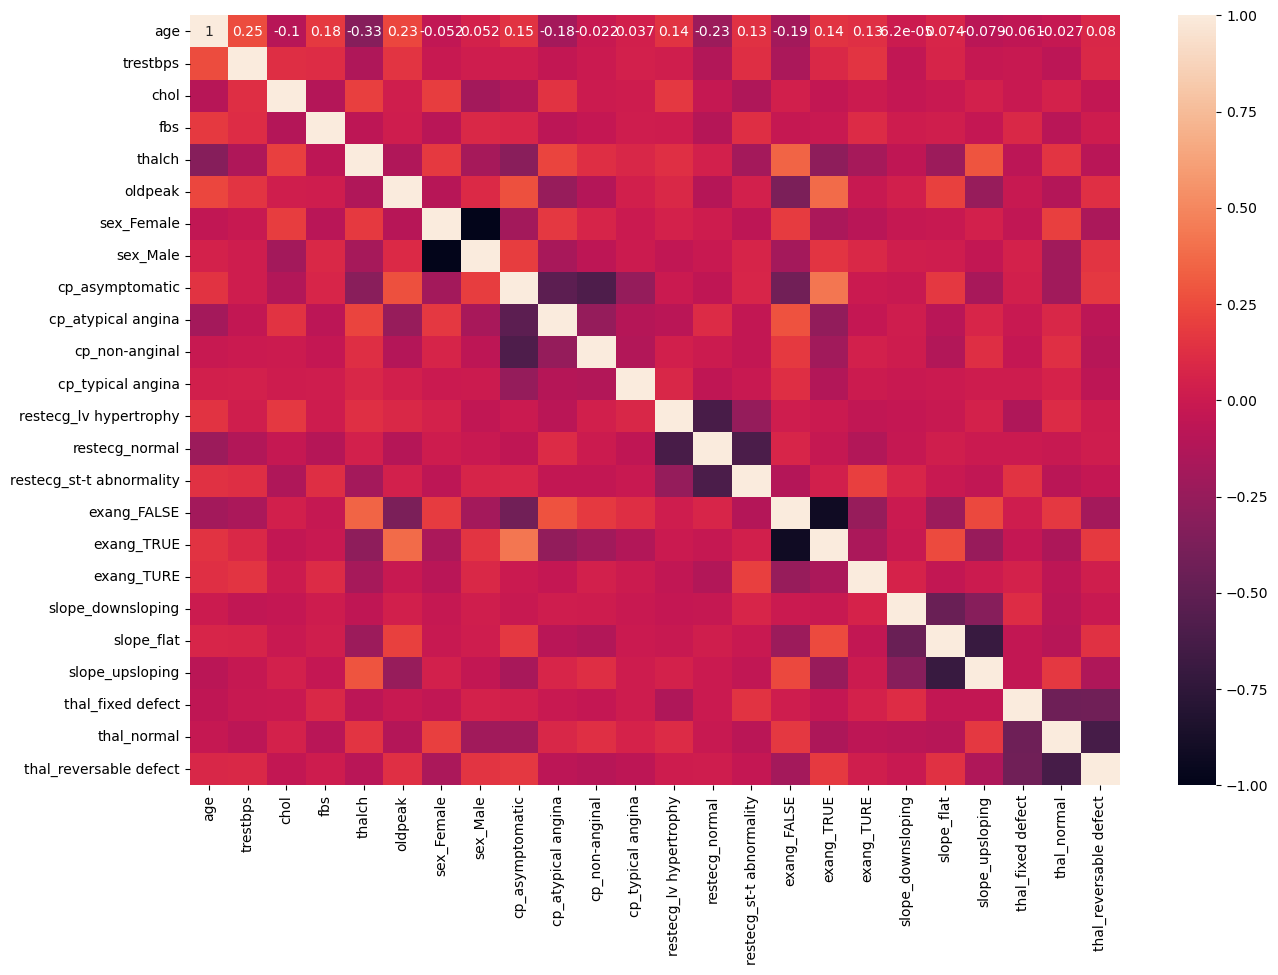

In [137]:
plt.figure(figsize=(15,10))
sns.heatmap(feature.corr(),annot=True)
plt.show()

In [84]:
target=df['num']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [86]:
feature=df.drop('num',axis=1)
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect


In [89]:
feature=pd.get_dummies(feature,dtype='int')
feature.head()

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.4,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.5,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0


Decision Tree Classification:
    
Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [91]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.8,random_state=50)

In [93]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     age  trestbps  chol    fbs  thalch  oldpeak  sex_Female  sex_Male  \
643   52       160   331  False      94      2.5           0         1   
639   47       135   248   True     170      0.0           1         0   
416   58       120   284  False     160      1.8           0         1   
279   50       140   129  False     135      0.0           0         1   
166   68       118   277  False     151      1.0           0         1   
..   ...       ...   ...    ...     ...      ...         ...       ...   
132   44       130   219  False     188      0.0           0         1   
289   53       120   195  False     140      0.0           0         1   
109   52       120   325  False     172      0.2           0         1   
480   43       132   247   True     143      0.1           0         1   
688   62       140     0  False     143      0.0           1         0   

     cp_asymptomatic  cp_atypical angina  ...  restecg_st-t abnormality  \
643                1                

In [94]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score


In [97]:
Dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=5)
Dec_tree

DecisionTreeClassifier(max_depth=5)

In [99]:
Dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [100]:
y_pred=Dec_tree.predict(x_test)

In [101]:
accuracy_score(y_test,y_pred)

0.521978021978022

In [103]:
Dec_tree1=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=5)
Dec_tree1

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [104]:
Dec_tree1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [106]:
y_pred1=Dec_tree1.predict(x_test)

In [107]:
accuracy_score(y_test,y_pred1)

0.554945054945055

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        72
           1       0.51      0.64      0.56        55
           2       0.33      0.21      0.26        29
           3       0.27      0.16      0.20        19
           4       0.00      0.00      0.00         7

    accuracy                           0.55       182
   macro avg       0.36      0.36      0.35       182
weighted avg       0.51      0.55      0.52       182



In [110]:
print(confusion_matrix(y_test,y_pred))

[[57 10  4  1  0]
 [15 35  2  2  1]
 [ 5 13  6  5  0]
 [ 4  8  4  3  0]
 [ 2  3  2  0  0]]


. Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion


In [116]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8]}

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
grid_search=GridSearchCV(Dec_tree,params)

In [119]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [122]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}

entropy is best hyperparameter fo this tree

maximum depth=3

we can split randomly

Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [128]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=1)

In [129]:
dec_tree

DecisionTreeClassifier(max_depth=1)

In [130]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [131]:
y_predict=dec_tree.predict(x_test)

In [132]:
accuracy_score(y_test,y_predict)

0.510989010989011

## Tree Structure Visulization

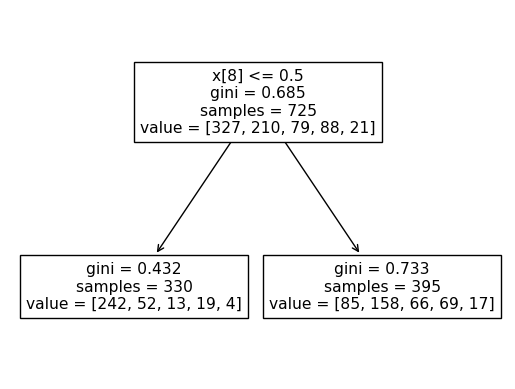

In [133]:
plot_tree(dec_tree)
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Its have three hyperparameter parameter these is ‘criticion’,’splitter’,’max_depth’ .

1) Max_depth is used to define the depth of the tree if the max_depth input is less than tree size then it is less and if input of max_depth high than tree size then it is big and get more information,

2) Criticion is used to decide the method like gini or entropy .

3) Splitter is also used to decide the method like best or random , best is used when there is no outlier present in the data sets & random is used when outlier is present

2. What is the difference between the Label encoding and One-hot encoding?

i]Label encoding is used to convert categorical column into numerical column.Label Encoding: Good for ordinal variables; can be misleading for nominal variables due to implied ordinality.

-Simple and memory-efficient.

-Maintains the ordinal relationship between categories if it exists.

Converts each category into a unique integer. For example, if you have three categories—red, green, and blue—they might be encoded as 0, 1, and 2, respectively.

ii]One_hot - Converts each category into a binary vector. For the same three categories—red, green, and blue—one-hot encoding will create three new columns, where each column represents one category, and a row will have a 1 in the column corresponding to the category and 0 in the others.

   -Avoids implying an ordinal relationship between categories.
    
   -Suitable for most machine learning algorithms as it prevents the model from assuming any ordinal relationship.